### Ejemplo de dataframe para gráfica de multilineas

In [2]:
import pandas as pd
import numpy as np

# Generar datos
fechas = pd.date_range(start="2000-01-01", end="2025-12-31", freq="YE")
n = len(fechas)

# Generar valores aleatorios que suben con el tiempo y caen bruscamente al final
valores = {
    "Fecha": fechas,
    "Columna1": np.concatenate([
        np.sort(np.random.uniform(100, 4000, n - 5)),  # Valores ascendentes aleatorios
        np.random.uniform(500, 1000, 5)  # Caída brusca al final
    ]),
    "Columna2": np.concatenate([
        np.sort(np.random.uniform(200, 3500, n - 5)),
        np.random.uniform(300, 800, 5)
    ]),
    "Columna3": np.concatenate([
        np.sort(np.random.uniform(300, 3000, n - 5)),
        np.random.uniform(100, 600, 5)
    ]),
    "Columna4": np.concatenate([
        np.sort(np.random.uniform(400, 2500, n - 5)),
        np.random.uniform(50, 500, 5)
    ]),
}

# Crear DataFrame
df = pd.DataFrame(valores)

# Mostrar el DataFrame
print(df)

        Fecha     Columna1     Columna2     Columna3     Columna4
0  2000-12-31   121.722113   335.379344   313.659561   509.537699
1  2001-12-31   174.568713   419.316994   465.679847   675.275334
2  2002-12-31   273.768862   430.971670   572.404611   740.305021
3  2003-12-31   314.617063   711.564435   639.374525   900.089668
4  2004-12-31   441.282442   909.782385   842.469534   921.098411
5  2005-12-31   686.434697  1070.684042   998.659553  1140.291254
6  2006-12-31   847.201105  1336.200642  1304.692045  1148.246832
7  2007-12-31  1102.051061  1376.017340  1489.314553  1352.630634
8  2008-12-31  1442.238576  1856.690912  1495.867805  1419.497007
9  2009-12-31  1512.888436  1861.497402  1538.268305  1466.828254
10 2010-12-31  1662.945776  1976.721207  1660.321416  1522.670944
11 2011-12-31  1694.765458  1998.839114  1862.935584  1542.973502
12 2012-12-31  1729.579195  2001.403136  2176.805999  1645.814025
13 2013-12-31  1916.365354  2009.568042  2321.738004  1713.138101
14 2014-12

### **Código a copiar para gráfica de multilineas:**

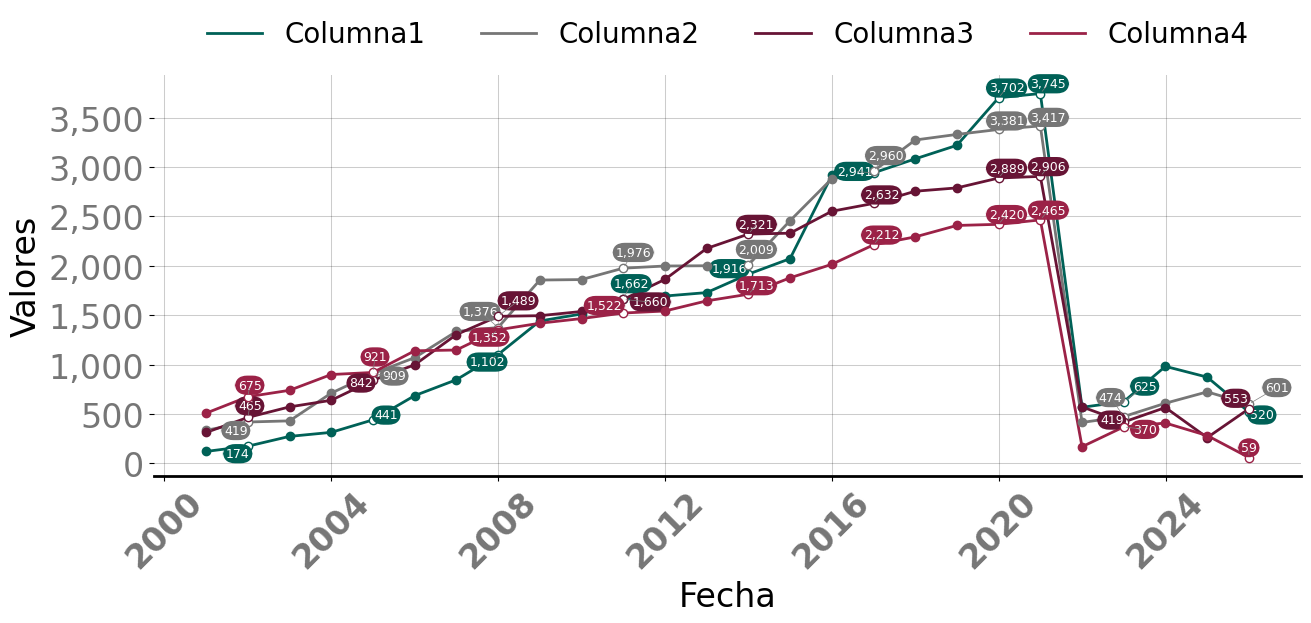

In [9]:
from pathlib import Path
from adjustText import adjust_text
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.font_manager as font_manager

# VARIABLES A CAMBIAR
dataframe_a_graficar = df  

# Configurar las fuentes SVG como texto editable
plt.rcParams['svg.fonttype'] = 'none'

# Ruta relativa para las fuentes
font_dirs = [Path("fonts/arial")]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# Crear una instancia de FontProperties para Arial
arial_font = font_manager.FontProperties(fname=str(font_files[0]))


def ajusta_etiquetas(dataframe, columnas, colores, columna_x, sin_tag=2, max=True, bbox_props=None, fontsize=12):
    """
    Ajusta las etiquetas de los puntos en una gráfica utilizando adjustText y configura los marcadores.

    Args:
        dataframe (pd.DataFrame): DataFrame que contiene los datos a graficar.
        columnas (list): Lista de columnas del DataFrame que se desean etiquetar.
        colores (list): Lista de colores para las etiquetas, uno por cada columna.
        columna_x (str): Nombre de la columna que se usará como eje X.
        sin_tag (int, optional): Cantidad de puntos consecutivos sin etiqueta entre puntos etiquetados. Por defecto es 10.
        max (bool, optional): Si es True, añade etiquetas en los puntos máximos de cada columna. Por defecto es True.
        bbox_props (dict, optional): Propiedades del fondo de las etiquetas. Si es None, se usa un fondo predeterminado.
        fontsize (int, optional): Tamaño de la fuente de las etiquetas. Por defecto es 12.
    """
    texts = []
    for col, color in zip(columnas, colores):
        total_puntos = len(dataframe)
        max_index = dataframe[col].idxmax() if max else None  # Índice del valor máximo si max=True
        for i, row in dataframe.iterrows():
            # Determinar si el punto debe tener etiqueta
            tiene_etiqueta = (total_puntos - i - 1) % (sin_tag + 1) == 0 or i == total_puntos - 1 or (max and i == max_index)
            
            # Configurar el marcador
            plt.scatter(
                row[columna_x], 
                row[col], 
                color="white" if tiene_etiqueta else color,  # Relleno blanco si tiene etiqueta
                edgecolor=color,  # Borde del color correspondiente
                zorder=3
            )
            
            if tiene_etiqueta:
                # Crear propiedades de la cápsula con esquinas más redondeadas
                bbox_props = dict(boxstyle="round,pad=0.25,rounding_size=0.99", fc=color, ec="none", alpha=1.0)
                # Agregar texto con el color blanco y la cápsula
                texts.append(plt.text(
                    row[columna_x], 
                    row[col], 
                    f"{int(row[col]):,}",  # Redondear a enteros
                    fontsize=fontsize, 
                    color="white", 
                    ha='center', 
                    va='bottom', 
                    bbox=bbox_props
                ))
    
    # Ajustar las etiquetas con adjustText
    adjust_text(
        texts,
        arrowprops=dict(arrowstyle='-', color='gray', lw=0.5),
        force_text=(0.5, 0.5),
        expand_points=(10, 10),
        expand_text=(1.2, 1.2),
        only_move={'points': 'y', 'text': 'xy'},
        autoalign='y'
    )


# Modificar la función multilineal para incluir la fuente personalizada
def multilineal(df, columna_fecha, tipografia=None):
    font_config = {
        'family': 'Arial',  # Cambiar a Arial
        'titulo': {'size': 36, 'weight': 'medium', 'color': '#000000'},
        'eje_y': {'size': 24, 'weight': 'medium', 'color': '#000000'},
        'eje_x': {'size': 24, 'weight': 'medium', 'color': '#000000'},
        'etiquetas_eje_y': {'size': 24, 'weight': 'medium', 'color': '#767676'},
        'etiquetas_eje_x': {'size': 24, 'weight': 'semibold', 'color': '#767676'},
        'capsula_valor': {'size': 9, 'weight': 'medium', 'color': '#10302C'},
        'capsula_max': {'size': 18, 'weight': 'medium', 'color': 'white'},
        'porcentaje': {'size': 10, 'weight': 'medium', 'color': '#4C6A67'},
        'leyenda': {'size': 20, 'weight': 'medium', 'color': '#767676'}  # Nueva categoría para la leyenda
    }

    # Verificar que la columna especificada exista en el DataFrame
    if columna_fecha not in df.columns:
        raise ValueError(f"La columna '{columna_fecha}' no existe en el DataFrame.")
    
    # Configurar el tamaño de la figura en píxeles
    ancho_px = 1480
    alto_px = 520
    dpi = 100  # Resolución en píxeles por pulgada
    ancho_in = ancho_px / dpi
    alto_in = alto_px / dpi
    
    # Crear la figura con el tamaño especificado
    fig, ax = plt.subplots(figsize=(ancho_in, alto_in), dpi=dpi)
    
    # Obtener los colores
    colores_asignados = ["#006157", "#767676", "#671435", "#9B2247", "#9D792A", "#D5B162"]
    
    # Obtener las columnas a graficar (excluyendo la columna de fecha)
    columnas_a_graficar = [col for col in df.columns if col != columna_fecha]
    
    # Graficar cada columna en el orden correcto
    for i, col in enumerate(columnas_a_graficar):
        ax.plot(
            df[columna_fecha], 
            df[col], 
            label=col, 
            color=colores_asignados[i % len(colores_asignados)],
            linewidth=2  # Cambiar el grosor de las líneas
        ) 

    # Configurar etiquetas y título
    ax.set_xlabel(
        columna_fecha, 
        fontsize=font_config['eje_x']['size'], 
        weight=font_config['eje_x']['weight'], 
        color=font_config['eje_x']['color']
    )
    ax.set_ylabel(
        "Valores", 
        fontsize=font_config['eje_y']['size'], 
        weight=font_config['eje_y']['weight'], 
        color=font_config['eje_y']['color']
    )

    # Rotar las etiquetas del eje X
    plt.xticks(
        rotation=45, 
        fontsize=font_config['etiquetas_eje_x']['size'], 
        weight=font_config['etiquetas_eje_x']['weight'], 
        color=font_config['etiquetas_eje_x']['color']
    )
    plt.yticks(
        fontsize=font_config['etiquetas_eje_y']['size'], 
        weight=font_config['etiquetas_eje_y']['weight'], 
        color=font_config['etiquetas_eje_y']['color']
    )
    
    # Posicionar la leyenda debajo del título y arriba de la gráfica
    ax.legend(
        loc='upper center', 
        bbox_to_anchor=(0.5, 1.2), 
        ncol=len(columnas_a_graficar), 
        frameon=False,  # Opcional: eliminar el fondo de la leyenda
        prop={
            'size': font_config['leyenda']['size'], 
            'weight': font_config['leyenda']['weight']
        }
    )

    # Desactivar o activar bordes
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(True)

    # Asignar grosor a los ejes visibles
    ax.spines['bottom'].set_linewidth(2)  # Grosor del eje inferior

    # Mantener las líneas del grid
    ax.grid(axis='y', linestyle='-', color='#000000', alpha=0.2, linewidth=0.75)
    ax.grid(axis='x', linestyle='-', color='#000000', alpha=0.2, linewidth=0.75)

    # Asegurarse de que las etiquetas del eje Y se mantengan visibles
    ax.yaxis.set_ticks_position('left')

    # Formatear los números del eje Y con comas
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

    # Llamar a la función ajusta_etiquetas
    ajusta_etiquetas(
        dataframe=df,
        columnas=columnas_a_graficar,
        colores=colores_asignados,
        columna_x=columna_fecha,  # Pasar la columna del eje X
        fontsize=font_config['capsula_valor']['size']
    )
    
    # Guardar la gráfica como archivo SVG
    plt.savefig("multilinea.svg", format="svg", bbox_inches='tight', dpi=dpi)


# Llamar a la función con el DataFrame df, la columna 'Fecha' y la fuente personalizada
multilineal(dataframe_a_graficar, columna_fecha="Fecha")